In [1]:
from numpy.random import seed
seed(123)
import tensorflow as tf
tf.random.set_seed(123) 
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils
import random
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import splitfolders

In [3]:
splitfolders.ratio("Data", output="output", seed=1337, ratio=(.8, .1, .1))

Copying files: 253 files [00:00, 1405.68 files/s]


In [4]:
trainingdatapath='./output/train'
testingdatapath='./output/test'
valdatapath='./output/val'

In [5]:
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale = 1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
test_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale = 1/255,
    )
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rescale = 1/255,
    )

In [6]:
train_set = train_datagen.flow_from_directory(trainingdatapath,
                                                 target_size = (224, 224), batch_size = 32, class_mode = 'categorical',shuffle=False)
test_set = test_datagen.flow_from_directory(testingdatapath,target_size = (224, 224),batch_size = 32,class_mode = 'categorical',shuffle=False)
val_set = val_datagen.flow_from_directory(valdatapath,target_size = (224, 224),batch_size = 32,class_mode = 'categorical',shuffle=False)

Found 202 images belonging to 2 classes.
Found 27 images belonging to 2 classes.
Found 24 images belonging to 2 classes.


In [7]:
#giving train folder path for checking of no of classes
folders = glob('./output/train/*')
print(len(folders))

2


In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout
from keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.layers import BatchNormalization

In [9]:
IMAGE_SIZE =[224,224]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
for layer in vgg.layers:
    
    layer.trainable = False

In [10]:
x = Flatten()(vgg.output)
x=Dense(units =1024, activation = 'relu')(x)
x=Dropout(0.4)(x)
x=Dense(units =512, activation = 'relu')(x)
#x=Dropout(0.1)(x)
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [11]:
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint
from keras.callbacks import ModelCheckpoint, EarlyStopping



checkpoint = ModelCheckpoint(filepath='mymodel.9017', 
                               verbose=2, save_best_only=True)
# early_stop = EarlyStopping(monitor='val_accuracy',
#                            patience=6,
#                            mode='max')

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=val_set,
  epochs=30,callbacks=callbacks ,verbose=2,shuffle=False)


duration = datetime.now() - start
print("Training completed in time: ", duration)

c:\users\rushabh surana\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
7/7 - 14s - loss: 1.1186 - accuracy: 0.4257 - val_loss: 0.6067 - val_accuracy: 0.6250

Epoch 00001: val_loss improved from inf to 0.60668, saving model to mymodel.9017
INFO:tensorflow:Assets written to: mymodel.9017\assets
Epoch 2/30
7/7 - 17s - loss: 0.6090 - accuracy: 0.6485 - val_loss: 1.0614 - val_accuracy: 0.6250

Epoch 00002: val_loss did not improve from 0.60668
Epoch 3/30
7/7 - 19s - loss: 1.1423 - accuracy: 0.4505 - val_loss: 0.5474 - val_accuracy: 0.7083

Epoch 00003: val_loss improved from 0.60668 to 0.54740, saving model to mymodel.9017
INFO:tensorflow:Assets written to: mymodel.9017\assets
Epoch 4/30
7/7 - 18s - loss: 0.5910 - accuracy: 0.6832 - val_loss: 0.7145 - val_accuracy: 0.6667

Epoch 00004: val_loss did not improve from 0.54740
Epoch 5/30
7/7 - 18s - loss: 0.6313 - accuracy: 0.6535 - val_loss: 0.7389 - val_accuracy: 0.6250

Epoch 00005: val_loss did not improve from 0.54740
Epoch 6/30
7/7 - 18s - loss: 0.8565 - accuracy: 0.4604 - val_loss: 0.5254 - val_a

In [21]:
#type1
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
true_classes = val_set.classes
vgg_preds = model.predict(val_set)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)
print(accuracy_score(true_classes, vgg_pred_classes)*100)

75.0


In [22]:
#type2
model.evaluate_generator(val_set)[1]

c:\users\rushabh surana\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


0.75

<AxesSubplot:>

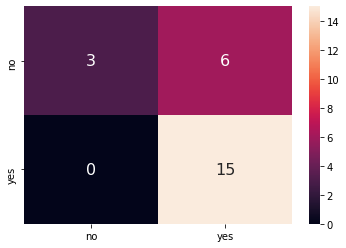

In [23]:
from sklearn.metrics import confusion_matrix
confusion_mtx = confusion_matrix(true_classes, vgg_pred_classes) 
sns.heatmap(confusion_mtx,annot=True, annot_kws={"size": 16},xticklabels=val_set.class_indices,yticklabels=val_set.class_indices,)

TEST Data Prediction

In [24]:
true_classes1 = test_set.classes
vgg_preds1 = model.predict(test_set)
vgg_pred_classes1 = np.argmax(vgg_preds1, axis=1)
print(accuracy_score(true_classes1, vgg_pred_classes1)*100)

85.18518518518519


In [25]:
model.evaluate_generator(test_set)[1]

c:\users\rushabh surana\appdata\local\programs\python\python39\lib\site-packages\keras\engine\training.py:1948: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


0.8518518805503845

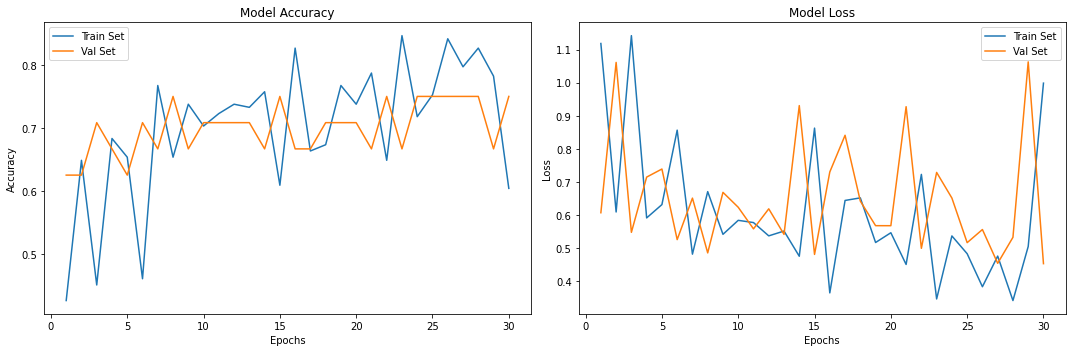

In [26]:
# plot model performance
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs_range = range(1, len(model_history.epoch) + 1)

plt.figure(figsize=(15,5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set')
plt.plot(epochs_range, val_acc, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set')
plt.plot(epochs_range, val_loss, label='Val Set')
plt.legend(loc="best")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.tight_layout()
plt.show()